#### Построить временной ход (линейный график) для температуры (T) и давления (P).

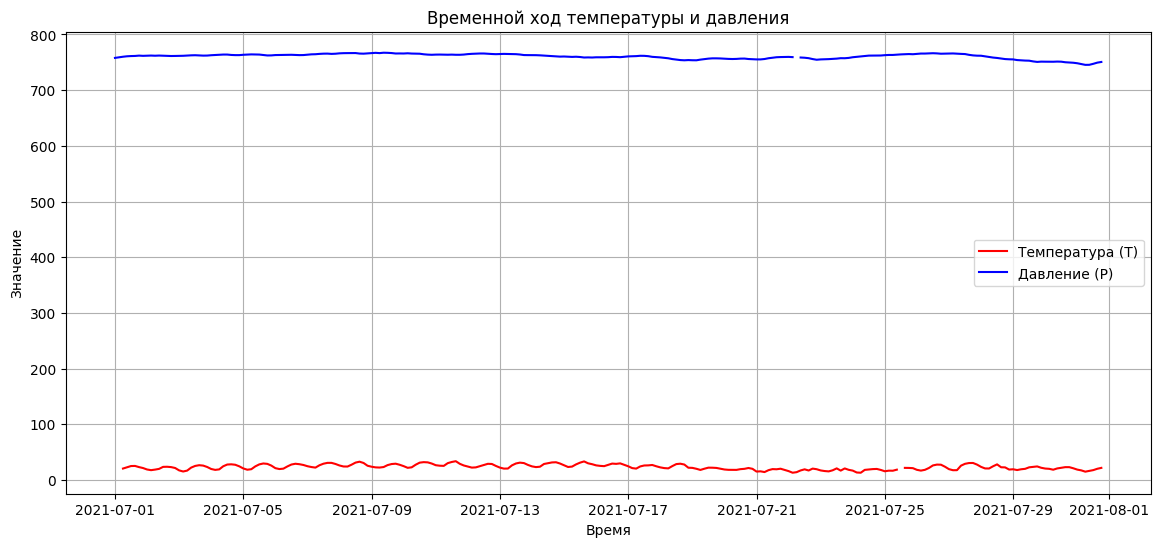

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('July.csv', skiprows=7, encoding='ANSI', delimiter=';')

# Переименовываем столбцы для удобства
data.columns = [
    'time', 'T', 'Po', 'P', 'Pa', 'U', 'wind_description', '1', 
    'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 
    'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Tn', 
    'cloud_description', 'Unnamed: 17', 'Unnamed: 18', 
    'high_cloud_description', 'low_cloud_description', 'h', 'dd', 
    'ff', 'e', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'
]

# Преобразование столбца времени в datetime
data['time'] = pd.to_datetime(data['time'], format='%d.%m.%Y %H:%M')

# Отфильтруем только нужные нам столбцы
data = data[['time', 'T', 'P']]

# Преобразуем температуры и давления в числовые значения
data['T'] = pd.to_numeric(data['T'], errors='coerce')
data['P'] = pd.to_numeric(data['P'], errors='coerce')

# Построение графика
plt.figure(figsize=(14, 6))
plt.plot(data['time'], data['T'], label='Температура (T)', color='red')
plt.plot(data['time'], data['P'], label='Давление (P)', color='blue')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Временной ход температуры и давления')
plt.legend()
plt.grid()
plt.show()


#### Построить распределение температуры поверхности моря для всего мира.

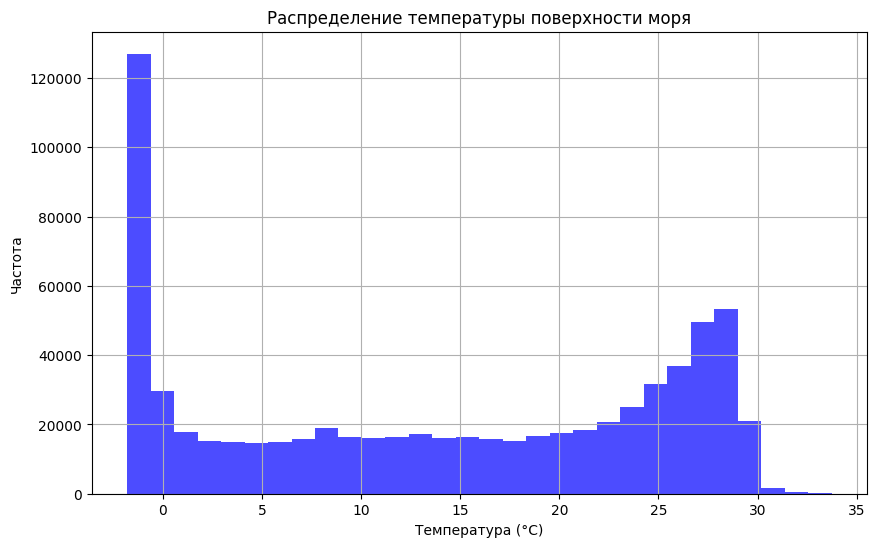

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

# Загрузка данных из файла NetCDF
ds = xr.open_dataset('sst.nc')

# Получение переменной sst
sst = ds['sst']

# Построение распределения
plt.figure(figsize=(10, 6))
sst.plot.hist(bins=30, color='blue', alpha=0.7)
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.title('Распределение температуры поверхности моря')
plt.grid()
plt.show()